## Simple Templates Fitting of a Quasar SED in Sherpa

Sherpa can use the template models and combined them with the other models. Here we show a simple template fitting to the SED of a quasar.
A set of accretion disk spectral models with the standard parameters (mass, accretion rate, inclination anlge) has been stored in the subdirectory Templates.  table.txt ascii file index these spectra as required for Sherpa. 

First import Sherpa packages

In [1]:
from sherpa.astro.ui import *

Define the optimization method and load the ascii data file ( $\log {\nu}, \log {\nu F_{\nu}}$, $1\sigma$ errors), plot the data and  set the data filter.  The SED covers broad-band and we filter the data to include only the optical-UV part for fitting with the disk models.

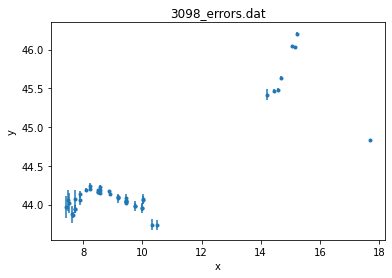

In [2]:
set_method('simplex')
load_ascii('3098_errors.dat', ncols=3, dstype=Data1D)
plot_data()
notice(13.5,16.)

Input template model defined via an ascii index file table.txt. The model name for Sherpa session is required and given as 'tbl' in this initial step. set_model() assignes the template model to the SED data. get_model() brings the information about the initial model parameters, which are based on the first entry in the table.txt index file.

In [3]:
load_template_model('tbl', 'table.txt')
set_model(tbl)
get_model()

<Template model instance 'template.tbl'>

In the next step the SED is fit with the templates using simplex neldermead algorithm. The chi2 statistics will be used with the measurement errors entered together with the data. The fit returns the screen output with the information about the best fit parameters and related statistical values.

Dataset               = 1
Method                = neldermead
Statistic             = chi2
Initial fit statistic = 426180
Final fit statistic   = 91.4691 at function evaluation 324
Data points           = 7
Degrees of freedom    = 4
Probability [Q-value] = 6.4175e-19
Reduced statistic     = 22.8673
Change in statistic   = 426089
   tbl.mass       8.98957     
   tbl.rate       0.305722    
   tbl.angle      0.995458    


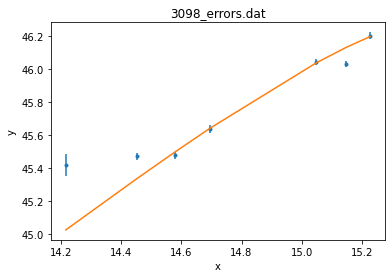

In [4]:
fit()
plot_fit()

plot_fit() generates a figure showing the data points overplotted with the line defined by the best fit mode parameters given above. The fit goes over the data points, but the reduced chi2 statistics is large, mainly due to the deviations at lower frequencies. 
We add a second model component to account for these deviations.

Dataset               = 1
Method                = neldermead
Statistic             = chi2
Initial fit statistic = 26.2289
Final fit statistic   = 19.3396 at function evaluation 275
Data points           = 5
Degrees of freedom    = 2
Probability [Q-value] = 6.31632e-05
Reduced statistic     = 9.66979
Change in statistic   = 6.88929
   tbl.mass       8.98154     
   tbl.rate       0.29325     
   tbl.angle      0.980385    


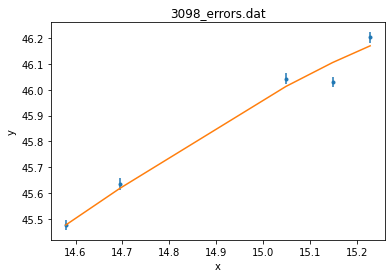

In [5]:
ignore()
notice(14.5,15.4)
fit()
plot_fit()

The reduced chi2 is still high. In order to obtain the confidence bounds for the best fit parameters we will set up the options for confidence before running it. 'sigma' defines the confidence level, 'max_rstat' defines the maximum value of reduced statistics allowed by confidence, if rstat is higher than the max_rstat conf() will fail.

In [6]:
set_conf_opt('sigma',1)
set_conf_opt('max_rstat',10)
conf()

tbl.mass -: WARNING: The confidence level lies within (8.961713e+00, 8.965722e+00)
tbl.mass lower bound:	-0.0178194
tbl.rate lower bound:	-0.0232344
tbl.rate +: WARNING: The confidence level lies within (3.397280e-01, 3.428440e-01)
tbl.rate upper bound:	0.0480356
tbl.angle -: WARNING: The confidence level lies within (9.657205e-01, 9.657121e-01)
tbl.angle lower bound:	-0.0146684
tbl.angle upper bound:	-----
tbl.mass +: WARNING: The confidence level lies within (9.035475e+00, 9.035465e+00)
tbl.mass upper bound:	0.0539335
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = neldermead
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   tbl.mass          8.98154   -0.0178194    0.0539335
   tbl.rate          0.29325   -0.0232344    0.0480356
   tbl.angle        0.980385   -0.0146684        -----


The screen output contains the confidence levels as well as the print out of the runs. These values can be accessed later as well using get_conf_results()

In [7]:
get_conf_results()

Parameter,Best-fit value,Lower Bound,Upper Bound
tbl.mass,8.98154,-0.0178194,0.0539335
tbl.rate,0.29325,-0.0232344,0.0480356
tbl.angle,0.980385,-0.0146684,-----


In [8]:
get_conf_results().parmins

(-0.017819382963949693, -0.023234427094558918, -0.014668384427378611)

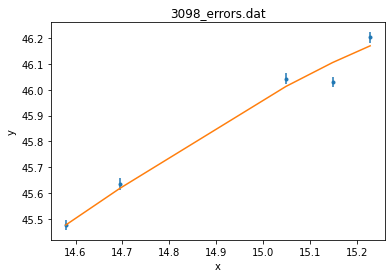

In [9]:
get_model()
plot_fit()

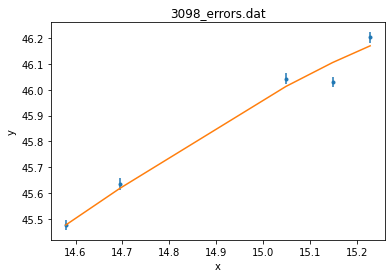

In [10]:
ignore()
notice(14.5,15.4)
plot_fit()